<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data_multi_delta_(2_8)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_2.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_2.8_n20.csv',
 'data_multi_delta_2.8_n30.csv',
 'data_multi_delta_2.8_n60.csv',
 'data_multi_delta_2.8_n120.csv',
 'data_multi_delta_2.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.8_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,90.579268,50.702186,43.358629,25.661172,-207.641470,12.659785,202.767031,-190.107246
1,0.0,1.0,94.751306,65.498329,35.952616,35.737732,335.132552,577.072535,240.552864,336.519671
2,0.0,2.0,29.275019,86.408435,93.164879,88.716529,-53.770108,253.794754,233.179387,20.615367
3,0.0,3.0,89.362586,46.385074,83.717093,20.180815,-119.010609,130.634960,135.157336,-4.522376
4,0.0,4.0,86.731834,97.027494,49.029508,35.302342,-67.054258,211.036921,218.811361,-7.774440
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,51.230414,25.393961,55.119997,34.576109,-71.049115,105.271365,142.304108,-37.032742
119996,999.0,116.0,37.769925,74.444839,65.698320,58.328337,-239.159967,7.081454,217.683917,-210.602463
119997,999.0,117.0,33.766220,49.203259,84.597886,86.621007,87.074251,351.262623,259.859502,91.403120
119998,999.0,118.0,97.654739,78.501191,63.245383,31.405095,-336.991843,-56.185434,179.059529,-235.244963


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,90.579268,50.702186,43.358629,25.661172,-207.641470,12.659785,202.767031,-190.107246
1,0.0,1.0,94.751306,65.498329,35.952616,35.737732,335.132552,577.072535,240.552864,336.519671
2,0.0,2.0,29.275019,86.408435,93.164879,88.716529,-53.770108,253.794754,233.179387,20.615367
3,0.0,3.0,89.362586,46.385074,83.717093,20.180815,-119.010609,130.634960,135.157336,-4.522376
4,0.0,4.0,86.731834,97.027494,49.029508,35.302342,-67.054258,211.036921,218.811361,-7.774440
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,51.230414,25.393961,55.119997,34.576109,-71.049115,105.271365,142.304108,-37.032742
119996,999.0,116.0,37.769925,74.444839,65.698320,58.328337,-239.159967,7.081454,217.683917,-210.602463
119997,999.0,117.0,33.766220,49.203259,84.597886,86.621007,87.074251,351.262623,259.859502,91.403120
119998,999.0,118.0,97.654739,78.501191,63.245383,31.405095,-336.991843,-56.185434,179.059529,-235.244963


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    90.579268  50.702186  43.358629  25.661172 -207.641470   
      1.0    94.751306  65.498329  35.952616  35.737732  335.132552   
      2.0    29.275019  86.408435  93.164879  88.716529  -53.770108   
      3.0    89.362586  46.385074  83.717093  20.180815 -119.010609   
      4.0    86.731834  97.027494  49.029508  35.302342  -67.054258   
...                ...        ...        ...        ...         ...   
999.0 115.0  51.230414  25.393961  55.119997  34.576109  -71.049115   
      116.0  37.769925  74.444839  65.698320  58.328337 -239.159967   
      117.0  33.766220  49.203259  84.597886  86.621007   87.074251   
      118.0  97.654739  78.501191  63.245383  31.405095 -336.991843   
      119.0  86.503778  38.254365  40.746892  70.308322  181.736076   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0     12.659785  202.767031 -190.107246  
      1.0    577.072535  240.552864  336.519671  
      2.0    253.794754  233.179387   20.615367  
      3.0    130.634960  135.157336   -4.522376  
      4.0    211.036921  218.811361   -7.774440  
...                 ...         ...         ...  
999.0 115.0  105.271365  142.304108  -37.032742  
      116.0    7.081454  217.683917 -210.602463  
      117.0  351.262623  259.859502   91.403120  
      118.0  -56.185434  179.059529 -235.244963  
      119.0  427.549433  255.866055  171.683378  

[120000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    90.579268  50.702186  43.358629  25.661172 -207.641470   
      1.0    94.751306  65.498329  35.952616  35.737732  335.132552   
      2.0    29.275019  86.408435  93.164879  88.716529  -53.770108   
      3.0    89.362586  46.385074  83.717093  20.180815 -119.010609   
      4.0    86.731834  97.027494  49.029508  35.302342  -67.054258   
...                ...        ...        ...        ...         ...   
999.0 115.0  51.230414  25.393961  55.119997  34.576109  -71.049115   
      116.0  37.769925  74.444839  65.698320  58.328337 -239.159967   
      117.0  33.766220  49.203259  84.597886  86.621007   87.074251   
      118.0  97.654739  78.501191  63.245383  31.405095 -336.991843   
      119.0  86.503778  38.254365  40.746892  70.308322  181.736076   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0     12.659785  202.767031 -190.107246  
      1.0    577.072535  240.552864  336.519671  
      2.0    253.794754  233.179387   20.615367  
      3.0    130.634960  135.157336   -4.522376  
      4.0    211.036921  218.811361   -7.774440  
...                 ...         ...         ...  
999.0 115.0  105.271365  142.304108  -37.032742  
      116.0    7.081454  217.683917 -210.602463  
      117.0  351.262623  259.859502   91.403120  
      118.0  -56.185434  179.059529 -235.244963  
      119.0  427.549433  255.866055  171.683378  

[120000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,90.579268,50.702186,43.358629,25.661172,-207.641470,12.659785,202.767031,-190.107246
1,0.0,1.0,94.751306,65.498329,35.952616,35.737732,335.132552,577.072535,240.552864,336.519671
2,0.0,2.0,29.275019,86.408435,93.164879,88.716529,-53.770108,253.794754,233.179387,20.615367
3,0.0,3.0,89.362586,46.385074,83.717093,20.180815,-119.010609,130.634960,135.157336,-4.522376
4,0.0,4.0,86.731834,97.027494,49.029508,35.302342,-67.054258,211.036921,218.811361,-7.774440
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,51.230414,25.393961,55.119997,34.576109,-71.049115,105.271365,142.304108,-37.032742
119996,999.0,116.0,37.769925,74.444839,65.698320,58.328337,-239.159967,7.081454,217.683917,-210.602463
119997,999.0,117.0,33.766220,49.203259,84.597886,86.621007,87.074251,351.262623,259.859502,91.403120
119998,999.0,118.0,97.654739,78.501191,63.245383,31.405095,-336.991843,-56.185434,179.059529,-235.244963


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    90.579268  50.702186  43.358629  25.661172 -207.641470   
      1.0    94.751306  65.498329  35.952616  35.737732  335.132552   
      2.0    29.275019  86.408435  93.164879  88.716529  -53.770108   
      3.0    89.362586  46.385074  83.717093  20.180815 -119.010609   
      4.0    86.731834  97.027494  49.029508  35.302342  -67.054258   
...                ...        ...        ...        ...         ...   
999.0 115.0  51.230414  25.393961  55.119997  34.576109  -71.049115   
      116.0  37.769925  74.444839  65.698320  58.328337 -239.159967   
      117.0  33.766220  49.203259  84.597886  86.621007   87.074251   
      118.0  97.654739  78.501191  63.245383  31.405095 -336.991843   
      119.0  86.503778  38.254365  40.746892  70.308322  181.736076   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0     12.659785  202.767031 -190.107246  
      1.0    577.072535  240.552864  336.519671  
      2.0    253.794754  233.179387   20.615367  
      3.0    130.634960  135.157336   -4.522376  
      4.0    211.036921  218.811361   -7.774440  
...                 ...         ...         ...  
999.0 115.0  105.271365  142.304108  -37.032742  
      116.0    7.081454  217.683917 -210.602463  
      117.0  351.262623  259.859502   91.403120  
      118.0  -56.185434  179.059529 -235.244963  
      119.0  427.549433  255.866055  171.683378  

[120000 rows x 8 columns]

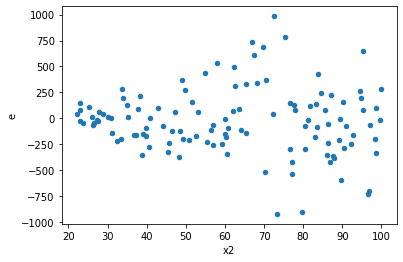

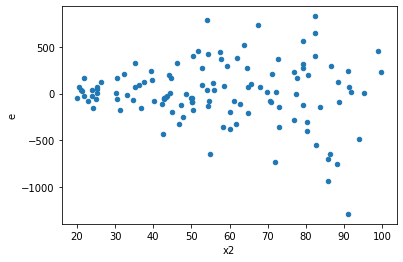

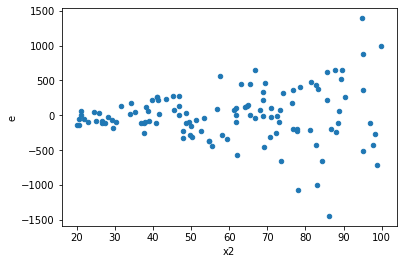

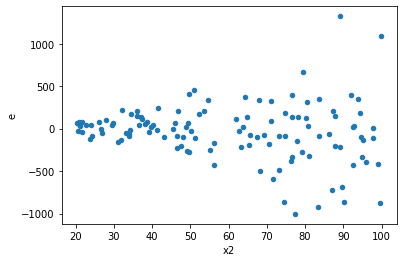

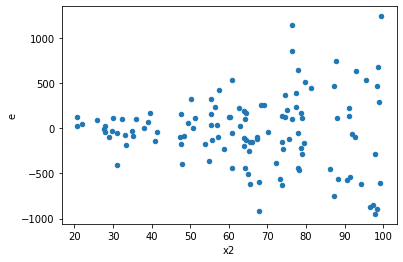

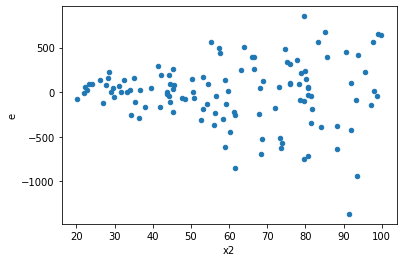

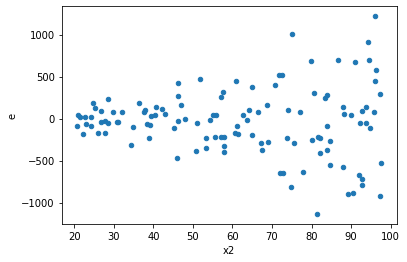

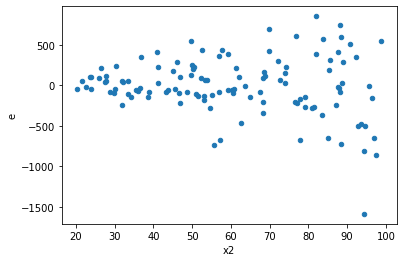

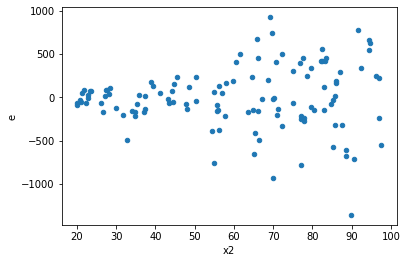

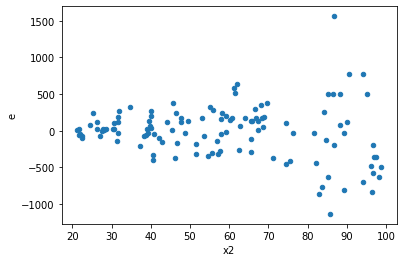

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,44.0,44.0,1478246.7281282041,5731005.227050917,33596.51654836827,130250.11879661176,3.8768935645186047,1.601017837837837e-05,0.9999919949108108,8.005089189189185e-06,Reject005=0 : Heteroscedasticity
1.0,44.0,44.0,896737.6304580695,7360280.199933795,20380.400692228854,167279.0954530408,8.207841346162793,1.299358398654249e-10,0.9999999999350321,6.496791993271245e-11,Reject005=0 : Heteroscedasticity
2.0,44.0,44.0,1016384.1529530801,12170913.493255485,23099.63983984273,276611.670301261,11.974717883876075,1.3722356584366935e-13,0.9999999999999314,6.861178292183467e-14,Reject005=0 : Heteroscedasticity
3.0,44.0,44.0,596339.186557049,10742760.712991215,13553.163330842024,244153.65256798218,18.014514147584872,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
4.0,44.0,44.0,1737790.120736957,12016228.596279161,39495.230016749025,273096.10446089,6.914660437350945,2.434029422460071e-09,0.9999999987829853,1.2170147112300356e-09,Reject005=0 : Heteroscedasticity
5.0,44.0,44.0,895631.6769587008,9646895.267148,20355.265385425017,219247.61970790906,10.771051890332856,9.85433956657289e-13,0.9999999999995073,4.927169783286445e-13,Reject005=0 : Heteroscedasticity
6.0,44.0,44.0,1517436.0151989637,13946664.085249547,34487.18216361281,316969.6383011261,9.190940471661921,1.7595480628074256e-11,0.9999999999912023,8.797740314037128e-12,Reject005=0 : Heteroscedasticity
7.0,44.0,44.0,1282363.0028882665,10279900.586899403,29144.613702006056,233634.10424771372,8.016373338708291,1.9594859068661208e-10,0.9999999999020257,9.797429534330604e-11,Reject005=0 : Heteroscedasticity
8.0,44.0,44.0,1378382.7827659224,8823505.945436817,31326.881426498236,200534.22603265493,6.401346603975413,8.714293509015647e-09,0.9999999956428532,4.3571467545078235e-09,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,44.0,44.0,1478246.7281282041,5731005.227050917,33596.51654836827,130250.11879661176,3.8768935645186047,1.601017837837837e-05,Reject005=0 : Heteroscedasticity
1.0,44.0,44.0,896737.6304580695,7360280.199933795,20380.400692228854,167279.0954530408,8.207841346162793,1.299358398654249e-10,Reject005=0 : Heteroscedasticity
2.0,44.0,44.0,1016384.1529530801,12170913.493255485,23099.63983984273,276611.670301261,11.974717883876075,1.3722356584366935e-13,Reject005=0 : Heteroscedasticity
3.0,44.0,44.0,596339.186557049,10742760.712991215,13553.163330842024,244153.65256798218,18.014514147584872,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
4.0,44.0,44.0,1737790.120736957,12016228.596279161,39495.230016749025,273096.10446089,6.914660437350945,2.434029422460071e-09,Reject005=0 : Heteroscedasticity
5.0,44.0,44.0,895631.6769587008,9646895.267148,20355.265385425017,219247.61970790906,10.771051890332856,9.85433956657289e-13,Reject005=0 : Heteroscedasticity
6.0,44.0,44.0,1517436.0151989637,13946664.085249547,34487.18216361281,316969.6383011261,9.190940471661921,1.7595480628074256e-11,Reject005=0 : Heteroscedasticity
7.0,44.0,44.0,1282363.0028882665,10279900.586899403,29144.613702006056,233634.10424771372,8.016373338708291,1.9594859068661208e-10,Reject005=0 : Heteroscedasticity
8.0,44.0,44.0,1378382.7827659224,8823505.945436817,31326.881426498236,200534.22603265493,6.401346603975413,8.714293509015647e-09,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64